In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img shape: (524, 690, 3)
(100, 100, 100) (100, 3) (100, 3, 3)


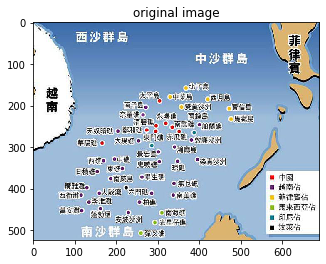

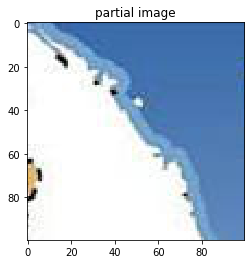

In [17]:
img_eg = mpimg.imread("./img/map.jpg")
print("img shape:",img_eg.shape)
plt.imshow(img_eg)
plt.title("original image")

plt.figure()
img_temp = img_eg[0:100,0:100,:]
plt.imshow(img_temp)
plt.title("partial image")

U,Sigma,VT = np.linalg.svd(img_temp)#进行SVD（奇异值）分解
print(U.shape,Sigma.shape,VT.shape)
#U,Sigma,VT分别对应奇异值分解的U\V、和奇异值矩阵


In [14]:
print(np.diag(Sigma[0:60]))

[2065.22010081  173.55308815   14.00346845]


In [12]:
# 取前60个奇异值
sval_nums = 60
img_restruct1 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
print(img_restruct1.shape)
img_restruct1 = img_restruct1.reshape(img_eg.shape[0], img_eg.shape[1],img_eg.shape[2])
 
# 取前120个奇异值
sval_nums = 220
img_restruct2 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct2 = img_restruct2.reshape(img_eg.shape[0], img_eg.shape[1],img_eg.shape[2])

# 取完整的奇异值
sval_nums = min(img_eg.shape[0],img_eg.shape[1])
img_restruct3 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct3 = img_restruct2.reshape(img_eg.shape[0], img_eg.shape[1],img_eg.shape[2])


ValueError: shapes (100,60,100) and (3,) not aligned: 100 (dim 2) != 3 (dim 0)

In [ ]:
fig, ax = plt.subplots(1,4,figsize = (24,32))
 
ax[0].imshow(img_eg)
ax[0].set(title = "src")
ax[1].imshow(img_restruct1.astype(np.uint8))
ax[1].set(title = "nums of sigma = 60")
ax[2].imshow(img_restruct2.astype(np.uint8))
ax[2].set(title = "nums of sigma = 120")
ax[3].imshow(img_restruct3.astype(np.uint8))
ax[3].set(title = "full ")
